# Tests of the Fast Rejection Algorithm for four-jet event selections

In [19]:
from h5py import File
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import random
import itertools as it
import time
import joblib

In [27]:
#Opening the HDF5 File
#input_file = "../../Datasets/output.h5"
#input_file = "../../Datasets/data22_13p6TeV.00440499.physics_EnhancedBias.h5"
input_file = "../../Datasets/EBdata.h5"
#input_file = "../../Datasets/hh4b.h5"
#input_file = "../../Datasets/jz0.h5"
#input_file = "../../Datasets/jz1.h5"
#input_file = "../../Datasets/jz2.h5"
#input_file = "../../Datasets/jz3.h5"
#input_file = "../../Datasets/jz4.h5"
#input_file = "../../Datasets/jz5.h5"
#input_file = "../../Datasets/user.viruelas.27383479._000001.output.h5"
#input_file = "../../Datasets/user.maboelel.32438279._000005.output.h5"

data = File(input_file, 'r')
print("List of available datasets: " + str(list(data.keys())))

List of available datasets: ['jets']


In [28]:
#Accessing the 'Jets' Dataset
jets = data['jets']
jets = jets[jets['pt'] > 120000]
jets = np.asarray(jets)
print("The attributes of each element of the dataset (jets): " + str(jets.dtype.fields.keys()))
print("The shape of the dataset is: " + str(jets.shape))

The attributes of each element of the dataset (jets): dict_keys(['pt', 'eta', 'fastDips_pb', 'fastDips_pc', 'fastDips_pu', 'fastGN120230327_pb', 'fastGN120230327_pc', 'fastGN120230327_pu', 'dipz20230223_z', 'dipz20230223_negLogSigma2', 'jetPtRank', 'mcEventWeight', 'eventNumber', 'averageInteractionsPerCrossing', 'actualInteractionsPerCrossing', 'nPrimaryVertices', 'primaryVertexBeamspotZ', 'primaryVertexDetectorZUncertainty'])
The shape of the dataset is: (3481,)


In [29]:
print("The number of jets in the sample is: " + str(len(jets)))
print("The number of jets in the sample with pT < 20 GeV is: " + str(len(jets[jets["pt"] < 120000])))
print("The number of jets in the sample with eta > 2.5 GeV is: " + str(len(jets[jets["eta"] > 2.5])))

The number of jets in the sample is: 3481
The number of jets in the sample with pT < 20 GeV is: 0
The number of jets in the sample with eta > 2.5 GeV is: 0


In [30]:
#Getting the events in our sample
uniques = np.unique(jets["eventNumber"])
print("The number of events in our sample is: " + str(len(uniques)))
print("The events_ID array looks like: " + str(uniques))

The number of events in our sample is: 2541
The events_ID array looks like: [1121208784 1121245086 1121253253 ... 1369163567 1369176939 1369206802]


In [31]:
#Getting a subset the events in our sample
sub_uniques = uniques[:5000]
print("The number of events in our subset is: " + str(len(sub_uniques)))
print("The events_ID array of the subset looks like: " + str(sub_uniques))

The number of events in our subset is: 2541
The events_ID array of the subset looks like: [1121208784 1121245086 1121253253 ... 1369163567 1369176939 1369206802]


In [8]:
%%time
# Getting an array of the jet multiplicities in the sample
jet_multiplicities = []
for i in uniques:
#for i in fom_events:
    jet_multiplicities.append(len(jets[jets["eventNumber"] == i]))

CPU times: user 7.95 s, sys: 64.5 ms, total: 8.02 s
Wall time: 8.02 s


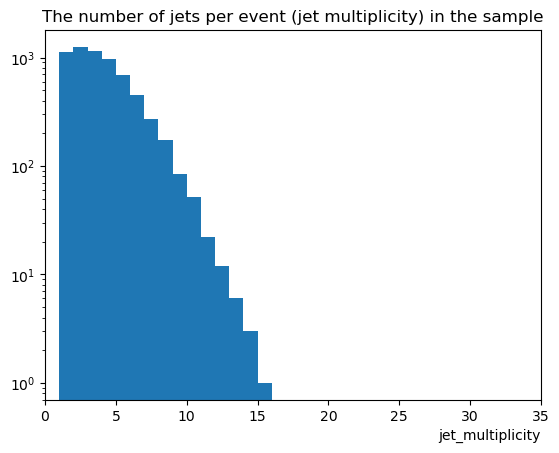

In [10]:
# Plotting the jet multiplicities in the sample
plt.hist(jet_multiplicities, bins = 50, range=(0,50))
plt.yscale('log')
plt.xlim([0,35])
#plt.ylim([0,22])
plt.xlabel("jet_multiplicity", loc='right')
plt.title('The number of jets per event (jet multiplicity) in the sample')
plt.show()

In [11]:
%%time
# Getting an array of the leading jet pT's per event in the sample
leading_pT = []
for i in sub_uniques:
    pTs = []
    event_jets = jets[jets["eventNumber"] == i]
    for jet in event_jets:
        pTs.append(jet['pt'])
    leading_pT.append(max(pTs))

CPU times: user 179 ms, sys: 0 ns, total: 179 ms
Wall time: 188 ms


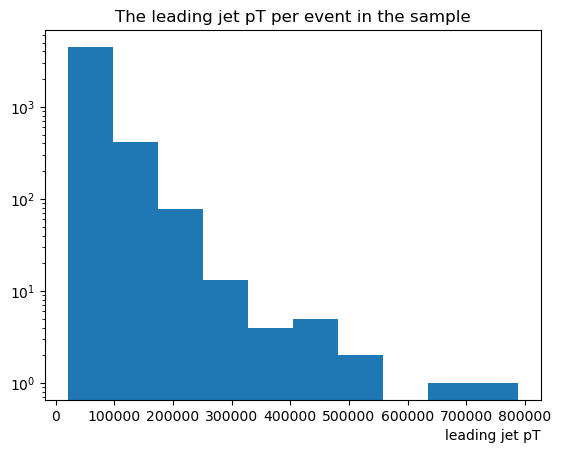

In [11]:
# Plotting the leading jet pT's per event in the sample
plt.hist(leading_pT, bins = 10)
plt.yscale('log')
plt.xlabel("leading jet pT", loc='right')
plt.title('The leading jet pT per event in the sample')
plt.show()

In [12]:
%%time
# Getting an array of the sub-leading jet pT's per event in the sample
subleading_pT = []
for i in uniques:
    pTs = []
    event_jets = jets[jets["eventNumber"] == i]
    for jet in event_jets:
        pTs.append(jet["pt"])
    if len(pTs) > 1: 
        subleading_pT.append(sorted(pTs)[-2])

CPU times: user 246 ms, sys: 0 ns, total: 246 ms
Wall time: 256 ms


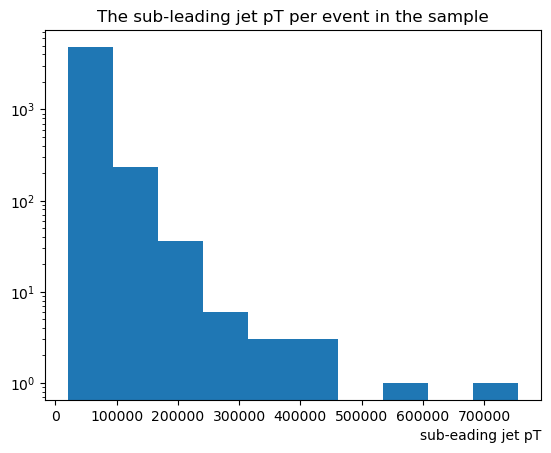

In [13]:
# Plotting the sub-leading jet pT's per event in the sample
plt.hist(subleading_pT, bins = 10)
plt.yscale('log')
plt.xlabel("sub-eading jet pT", loc='right')
plt.title('The sub-leading jet pT per event in the sample')
plt.show()

In [7]:
#Filtering the four-or-more jet events
fom_events = []
oaoo_events = []
counter = 0
for id in sub_uniques:
    if len(jets[jets["eventNumber"] == id]) >= 4:
        fom_events.append(id)
        counter +=1
    if len(jets[jets["eventNumber"] == id]) == 1:
        oaoo_events.append(id)
    #if counter == 1000:
        #break
"""
for id in sub_uniques:
    event_jets = jets[jets["eventNumber"] == id]
    bjets = event_jets[event_jets["HadronConeExclTruthLabelID"] == 5]
    if len(event_jets) >= 4 & len(bjets) >= 4:
        fom_events.append(id)
        #counter +=1
    #if counter == 100:
        #break
"""

print("The number of events that have four or more (fom) selected jets is: " + str(len(fom_events)))
print("The number of events that have one and only one (oaoo) selected jets is: " + str(len(oaoo_events)))

The number of events that have four or more (fom) selected jets is: 2171
The number of events that have one and only one (oaoo) selected jets is: 899


In [20]:
# A function that takes in the event number and calculates the maximum over 4-jet combinations of log of the product of the 
# likelihood functions of all the jets in the event NUMERICALLY

def get_max_log_likelihood_num(event_id,jets):
    event_jets = jets[jets["eventNumber"] == event_id]
    #num_jets = len(event_jets)
    z = np.arange(-5*50, 5*50, 0.1)

    combinations = []
    mlpl_array = []

    for combination in it.combinations(event_jets, 4):
        combinations.append(combination)

    for comb in combinations:
        log_total_likelihood = -4 * np.log(np.sqrt(2*np.pi))
            
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) *50
            #likelihood = (2*np.pi)**(-1/2) * (sigma)**(-1) * np.exp( -1 * (z - mu)**2 * (2 * sigma^2)**(-1) )
            log_total_likelihood -= ( np.log(sigma) + (z - mu)**2 * (2 * sigma**(2))**(-1) )
    
        mlpl_array.append(max(log_total_likelihood))
            
    
    max_log_likelihood = max(mlpl_array)
        
    return max_log_likelihood

In [21]:
# A function that takes in the event number and calculates the maximum over 4-jet combinations of log of the product of the likelihood functions 
# of all the jets in the event ANALYTICALLY
def get_max_log_likelihood_an(event_id,jets,comb_num,num_highest_pt=555555):
    event_jets = jets[jets["eventNumber"] == event_id]
    
    if num_highest_pt != 555555:
        if len(event_jets) > num_highest_pt:
            event_jets = event_jets[(-event_jets['pt']).argsort()[:num_highest_pt]]
    
    combinations = []
    mlpl_array = []

    for combination in it.combinations(event_jets, comb_num):
        combinations.append(combination)

    for comb in combinations:
        num = 0
        denom = 0
        second_term = 0
        third_term = 0
        
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50
            num += (mu) / (sigma**2)
            denom += 1 / (sigma**2)
            second_term -= np.log(sigma)
        
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50
            third_term -= ((num / denom) - mu)**2 / (2*(sigma**2)) 
            
        mlpl_array.append(- (comb_num/2) * np.log(2*np.pi) + second_term + third_term)
            
    
    max_log_likelihood = max(mlpl_array)
        
    return max_log_likelihood


In [22]:
# A function that takes in the event number and calculates the maximum over 4-jet combinations of log of the product of the 
# likelihood functions of all the jets in the event ANALYTICALLY

def get_max_log_likelihood_an_hh4b(event_id,jets,comb_num,num_highest_pt=555555):
    event_jets = jets[jets["eventNumber"] == event_id]

    if num_highest_pt != 555555:
        if len(event_jets) > num_highest_pt:
            event_jets = event_jets[(-event_jets['pt']).argsort()[:num_highest_pt]]
    
    combinations = []

    for combination in it.combinations(event_jets, comb_num):
        combinations.append(combination)

    mlpl = -999999999999
    num_bjets_chosen = 0

    for comb in combinations:
        num = 0
        denom = 0
        second_term = 0
        third_term = 0
        num_bjets = 0 
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            num += (mu) / (sigma**2)
            denom += 1 / (sigma**2)
            second_term -= np.log(sigma)
            
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            third_term -= ((num / denom) - mu)**2 / (2*sigma**2)

            if jet['HadronConeExclTruthLabelID'] == 5:
               num_bjets += 1
    
        if -4 * np.log(np.sqrt(2*np.pi)) + second_term + third_term > mlpl:
            mlpl = -4 * np.log(np.sqrt(2*np.pi)) + second_term + third_term
            num_bjets_chosen = num_bjets
    
    max_log_likelihood = mlpl
    
    return max_log_likelihood, num_bjets_chosen

In [98]:
%%time
for i in fom_events:
    get_max_log_likelihood_an_hh4b(i,jets,4)
    #break

CPU times: user 5.7 s, sys: 48.2 ms, total: 5.75 s
Wall time: 5.84 s


In [99]:
%%time
for i in fom_events:
    get_max_log_likelihood_an_hh4b(i,jets,3)
    #break

CPU times: user 3.4 s, sys: 19.5 ms, total: 3.42 s
Wall time: 3.48 s


In [100]:
%%time
for i in fom_events:
    get_max_log_likelihood_an_hh4b(i,jets,3,5)
    #break

CPU times: user 1.75 s, sys: 11.4 ms, total: 1.76 s
Wall time: 1.78 s


In [102]:
%%time
for i in fom_events:
    get_max_log_likelihood_an_hh4b(i,jets,2)
    #break

CPU times: user 1.89 s, sys: 25 ms, total: 1.91 s
Wall time: 2 s


In [103]:
def get_max_log_likelihood_dist(string, num=999999999999999):
    start = time.time()
    data = File(string, 'r')
    jets = data['jets']
    uniques = np.unique(jets["eventNumber"])
    
    print("The number of jets in the sample is: " + str(len(jets)))
    print("The number of jets in the sample with pT < 20 GeV is: " + str(len(jets[jets["pt"] < 20])))
    print("The number of jets in the sample with eta > 2.5 GeV is: " + str(len(jets[jets["eta"] > 2.5])))
    print("The number of events in our sample is: " + str(len(uniques)))
    
    max_log_likelihood_list = []
    no_of_processed_events = num
    counter = 0

    for id in uniques:
        if len(jets[jets["eventNumber"] == id]) >= 4:
            max_log_likelihood_list.append(get_max_log_likelihood_an(id,jets))
            counter +=1
        if counter == no_of_processed_events:
            break

    if counter == no_of_processed_events:
        print("The provided number of four or more jet events in the sample was run over and it is: " + str(num))
    if counter != no_of_processed_events:
        print("The number of four or more jet events in the sample is: " + str(counter))
        print("The number of four or more jet events in the sample is less than the provided number, therefore all the sample was run over.")
    end = time.time()
    print("The time of execution of the (get_max_log_likelihood_dist) function is :", ((end-start) / 60) , "min")

    return max_log_likelihood_list

def plot_distribution(max_log_likelihood_list):
    plt.hist(max_log_likelihood_list, bins = 500)
    plt.yscale("log")
    plt.xlabel("MLPL", loc='right')
    plt.title('Distribution of the discriminant variable (MLPL)')
    plt.show()

In [104]:
def get_max_log_likelihood_dist_hh4b(name, comb_num, num=999999999999999, num_highest_pt=555555):
    t1 = time.time()
    
    data = File(name, 'r')
    jets = data['jets']
    jets = np.asarray(jets)
    uniques = np.unique(jets["eventNumber"])
    
    """print("The number of jets in the sample is: " + str(len(jets)))
    print("The number of jets in the sample with pT < 20 GeV is: " + str(len(jets[jets["pt"] < 20])))
    print("The number of jets in the sample with eta > 2.5 GeV is: " + str(len(jets[jets["eta"] > 2.5])))
    print("The number of events in our sample is: " + str(len(uniques)))"""
    
    max_log_likelihood_list = []
    num_bjets_chosen_list = []
    jet_multiplicities = []
    no_of_processed_events = num
    counter = 0
    
    t2 = time.time()

    print("The time of execution of the initialization functions is :", (round(t2-t1, 2)) , "sec")

    time_preparing_eventjets = 0
    time_executing_getMLPL = 0
    time_executing_getMultiplicity = 0
    time_executing_whole_eventloop = 0


    t3 = time.time()
    for id in uniques:
        t5 = time.time()
        jet_multiplicities.append(len(jets[jets["eventNumber"] == id]))
        t6 = time.time()
        time_executing_getMultiplicity += t6-t5
        t7 = time.time()
        event_jets = jets[jets["eventNumber"] == id]
        bjets = event_jets[event_jets["HadronConeExclTruthLabelID"] == 5]
        t8 = time.time()
        time_preparing_eventjets += t8-t7
        if len(event_jets) >= 4 & len(bjets) >= 4:
            t9 = time.time()
            max_log_likelihood, num_bjets_chosen = get_max_log_likelihood_an_hh4b(id,jets,comb_num,num_highest_pt)
            max_log_likelihood_list.append(max_log_likelihood)
            num_bjets_chosen_list.append(num_bjets_chosen)
            t10 = time.time()
            time_executing_getMLPL += t10-t9
            counter +=1
        if counter == no_of_processed_events:
            break
    t4 = time.time()

    time_executing_whole_eventloop += t4-t3

    if counter == no_of_processed_events:
        print("The provided number of four or more b-jet events in the sample was run over and it is: " + str(num))
    if counter != no_of_processed_events:
        print("The number of four or more b-jet events in the sample is: " + str(counter))
        print("The number of four or more b-jet events in the sample is less than the provided number, therefore all the sample was run over.")
    t11 = time.time()

    print("The time_preparing_eventjets is:", round(time_preparing_eventjets, 2), "sec")
    print("The time_executing_getMLPL is:", round(time_executing_getMLPL, 2), "sec")
    print("The time_executing_getMultiplicity is:", round(time_executing_getMultiplicity, 2), "sec")
    print("The time_executing_whole_eventloop is:", round(time_executing_whole_eventloop, 2), "sec")
    print("The time of execution of the (get_max_log_likelihood_dist) on the (" +name+ ") file function is:", round(t11-t1, 2) , "sec")

    return max_log_likelihood_list, jet_multiplicities, num_bjets_chosen_list

The time of execution of the initialization functions is : 0.25 sec
The provided number of four or more b-jet events in the sample was run over and it is: 100
The time_preparing_eventjets is: 0.16 sec
The time_executing_getMLPL is: 0.48 sec
The time_executing_getMultiplicity is: 0.15 sec
The time_executing_whole_eventloop is: 0.79 sec
The time of execution of the (get_max_log_likelihood_dist) on the (../hh4b.h5) file function is: 1.04 sec


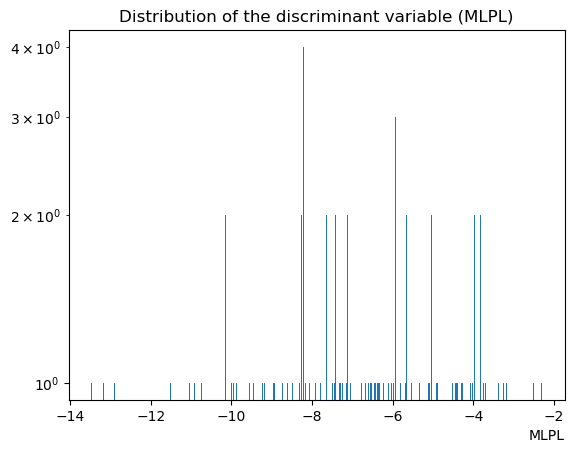

['test_dist.sav']

In [105]:
test_dist, jet_multiplicities, num_bjets_chosen_list = get_max_log_likelihood_dist_hh4b(input_file, 4, 100)
plot_distribution(test_dist)
joblib.dump(test_dist, 'test_dist.sav')

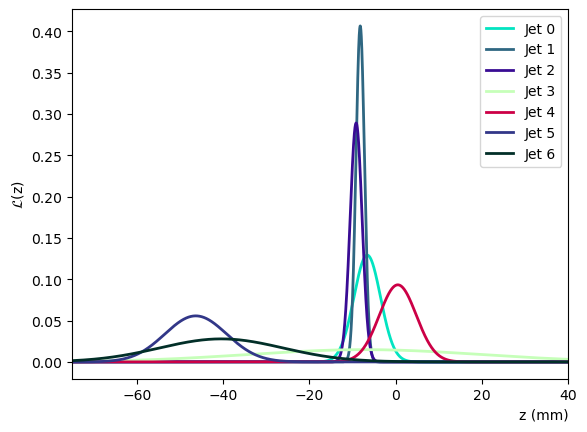

In [15]:
# Visualizing the jets in one event
index = 0

for id in uniques:
    event_jets = jets[jets["eventNumber"] == id];
    #bjets = event_jets[event_jets["HadronConeExclTruthLabelID"] == 5];
    if len(event_jets) >= 6:
        index = id
        break;
    

event_id = fom_events[19]
event_jets = jets[jets["eventNumber"] == event_id]
num_jets = len(event_jets)

#Generating random colors for  the plot
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
           for j in range(num_jets)]
ic = 0      #color counter
x = np.arange(-3*50, 3*50, 0.01)

for i in range(num_jets):
    mu = event_jets[i]["dipz20230223_z"] * 50
    sigma = np.exp(-0.5*event_jets[i]["dipz20230223_negLogSigma2"] ) * 50 
    #plt.plot(x, norm.pdf(x, event_jets[i]["dipz20230223_z"], np.exp(-0.5*event_jets[i]["dipz20230223_negLogSigma2"])), color=color[ic], linewidth=2, label='Jet '+str(ic))
    plt.plot(x, norm.pdf(x, mu, sigma), color=color[ic], linewidth=2, label='Jet '+str(ic))
    ic = ic + 1    
plt.xlabel("z (mm)", loc='right')
plt.ylabel("$\mathcal{L}$(z)")
#plt.title("Regressed gaussian for the event jets' origins on the z-axis (a dijet event)")
plt.xlim([-75, 40])
plt.legend()
#plt.savefig("EBdata3.png")
plt.show()
#print("MLLP for this event is: " + str(get_max_log_likelihood_an_(fom_events[index],jets, 4)))

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## Doing the leading pT distribution the weighted sum of the JZ slices =

In [25]:
norm_jz0 = 50000 / len(leading_pT_jz0)
norm_jz1 = 50000 / len(leading_pT_jz1)
norm_jz2 = 50000 / len(leading_pT_jz2)
norm_jz3 = 50000 / len(leading_pT_jz3)
norm_jz4 = 50000 / len(leading_pT_jz4)
norm_jz5 = 50000 / len(leading_pT_jz5)

In [26]:
leading_pT_jz0 = joblib.load("./leading_pt_dist/leading_pT_jz0_dist.sav")
leading_pT_jz1 = joblib.load("./leading_pt_dist/leading_pT_jz1_dist.sav")
leading_pT_jz2 = joblib.load("./leading_pt_dist/leading_pT_jz2_dist.sav")
leading_pT_jz3 = joblib.load("./leading_pt_dist/leading_pT_jz3_dist.sav")
leading_pT_jz4 = joblib.load("./leading_pt_dist/leading_pT_jz4_dist.sav")
leading_pT_jz5 = joblib.load("./leading_pt_dist/leading_pT_jz5_dist.sav")

In [27]:
weights_jz0 = np.full_like(leading_pT_jz0,norm_jz0 * 0.7651165653000001)
weights_jz1 = np.full_like(leading_pT_jz1,norm_jz1 * 0.0032993956809600007)
weights_jz2 = np.full_like(leading_pT_jz2,norm_jz2 * 2.6009622717000003e-05)
weights_jz3 = np.full_like(leading_pT_jz3,norm_jz3 * 3.3590422200000005e-07)
weights_jz4 = np.full_like(leading_pT_jz4,norm_jz4 * 3.8673973868e-09)
weights_jz5 = np.full_like(leading_pT_jz5,norm_jz5 * 7.7799492096e-11)

In [28]:
no_bins = 100
leading_pT_jz0_hist, jz0_bin_edges = np.histogram(leading_pT_jz0, weights=weights_jz0, bins = no_bins, range = (0, 100000))
leading_pT_jz1_hist, jz1_bin_edges = np.histogram(leading_pT_jz1, weights=weights_jz1, bins = no_bins, range = (0, 100000))
leading_pT_jz2_hist, jz2_bin_edges = np.histogram(leading_pT_jz2, weights=weights_jz2, bins = no_bins, range = (0, 100000))
leading_pT_jz3_hist, jz3_bin_edges = np.histogram(leading_pT_jz3, weights=weights_jz3, bins = no_bins, range = (0, 100000))
leading_pT_jz4_hist, jz4_bin_edges = np.histogram(leading_pT_jz4, weights=weights_jz4, bins = no_bins, range = (0, 100000))
leading_pT_jz5_hist, jz5_bin_edges = np.histogram(leading_pT_jz5, weights=weights_jz5, bins = no_bins, range = (0, 100000))

In [29]:
leading_pT_total_hist = leading_pT_jz0_hist + leading_pT_jz1_hist + leading_pT_jz2_hist + leading_pT_jz3_hist + leading_pT_jz4_hist + leading_pT_jz5_hist

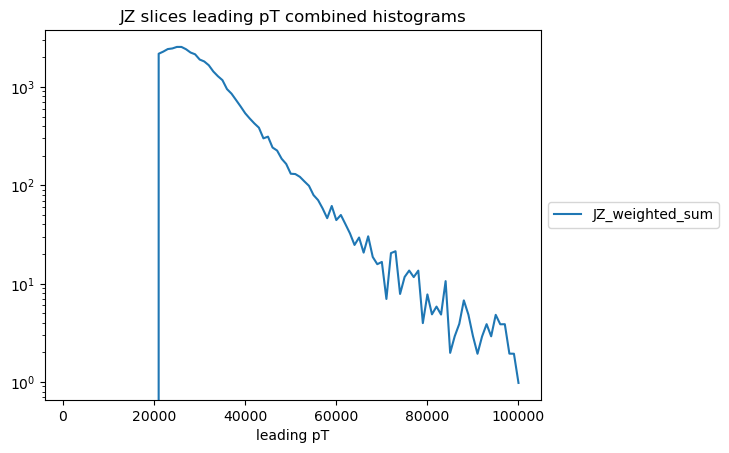

In [30]:
"""JZ slices leading pT combined histograms"""
bins = np.linspace(0, 100000, 100)

plt.plot(jz0_bin_edges[1:],leading_pT_total_hist, alpha=1, label='JZ_weighted_sum')
#plt.hist(leading_pT_jz0, bins, weights=weights_jz0, alpha=1, label='jz0_dist', histtype='stepfilled')
#plt.hist(leading_pT_jz1, bins, weights=weights_jz1, alpha=0.5, label='jz1_dist', histtype='step')
#plt.hist(leading_pT_jz2, bins, weights=weights_jz2, alpha=0.4, label='jz2_dist', histtype='step')
#plt.hist(leading_pT_jz3, bins, weights=weights_jz3, alpha=0.3, label='jz3_dist', histtype='step')
#plt.hist(leading_pT_jz4, bins, weights=weights_jz4, alpha=0.2, label='jz4_dist', histtype='step')
#plt.hist(leading_pT_jz5, bins, weights=weights_jz5, alpha=0.5, label='jz5_dist', histtype='step')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.title("JZ slices leading pT combined histograms")
plt.xlabel("leading pT")
plt.show()

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Trial and Error

In [48]:
def get_max_log_likelihood_an_hh4b(event_id,jets,comb_num,num_highest_pt=555555):
    event_jets = jets[jets["eventNumber"] == event_id]

    if num_highest_pt != 555555:
        if len(event_jets) > num_highest_pt:
            event_jets = event_jets[(-event_jets['pt']).argsort()[:num_highest_pt]]
    
    combinations = []

    for combination in it.combinations(event_jets, comb_num):
        combinations.append(combination)

    mlpl = -999999999999
    num_bjets_chosen = 0

    for comb in combinations:
        num = 0
        denom = 0
        second_term = 0
        third_term = 0
        num_bjets = 0 
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            num += (mu) / (sigma**2)
            denom += 1 / (sigma**2)
            second_term -= np.log(sigma)
            
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            third_term -= ((num / denom) - mu)**2 / (2*sigma**2)

            if jet['HadronConeExclTruthLabelID'] == 5:
               num_bjets += 1
    
        if -4 * np.log(np.sqrt(2*np.pi)) + second_term + third_term > mlpl:
            mlpl = -4 * np.log(np.sqrt(2*np.pi)) + second_term + third_term
            num_bjets_chosen = num_bjets
    
    max_log_likelihood = mlpl
    
    return max_log_likelihood, num_bjets_chosen


In [49]:
%%time 
get_max_log_likelihood_an_hh4b(fom_events[11],jets,4)

ValueError: no field of name HadronConeExclTruthLabelID

In [50]:
%%time 
get_max_log_likelihood_an(fom_events[11],jets,4)

CPU times: user 3.97 ms, sys: 3.99 ms, total: 7.96 ms
Wall time: 7.97 ms


-10.85633698718557

In [26]:
def get_leading_pt_dist(string, max_num=30000):
    data = File(string, 'r')
    jets = data['jets']
    uniques = np.unique(jets["eventNumber"])
        
    counter = 0
    leading_pT = []
    
    for i in uniques:
        pTs = []
        event_jets = jets[jets["eventNumber"] == i]
        for jet in event_jets:
            pTs.append(jet["pt"])
        leading_pT.append(max(pTs))
        counter += 1
        if counter == max_num:
            break 
    return leading_pT

## Reading XML files

In [41]:
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse('../../Datasets/EnhancedBiasWeights_440499.xml')
root = tree.getroot()

# Process the <weights> section
weights = root.find('weights')
weights_data = {}
for weight in weights.findall('weight'):
    weight_id = weight.get('id')
    value = weight.get('value')
    unbiased = weight.get('unbiased')
    weights_data[weight_id] = {
        'value': value,
        'unbiased': unbiased
    }

# Process the <events> section
events = root.find('events')
events_data = {}
for event in events.findall('e'):
    event_n = event.get('n')
    event_w = event.get('w')
    events_data[event_n] = event_w

In [35]:
#Getting the events in our sample
uniques = np.unique(jets["eventNumber"])
print("The number of events in our sample is: " + str(len(uniques)))
print("The events_ID array looks like: " + str(uniques))

The number of events in our sample is: 40832
The events_ID array looks like: [1121149213 1121150716 1121151121 ... 1369217112 1369217724 1369222196]


In [49]:
weights_data[str(events_data[str(1121149213)])]["value"]

'137518'

## Sample File

In [73]:
#a.py
from h5py import File
import numpy as np
import itertools as it
import xml.etree.ElementTree as ET
import time


def get_max_log_likelihood_an(event_id,jets,comb_num,num_highest_pt=555555):
    event_jets = jets[jets["eventNumber"] == event_id]
    
    if num_highest_pt != 555555:
        if len(event_jets) > num_highest_pt:
            event_jets = event_jets[(-event_jets['pt']).argsort()[:num_highest_pt]]
    
    combinations = []
    mlpl_array = []

    for combination in it.combinations(event_jets, comb_num):
        combinations.append(combination)

    for comb in combinations:
        num = 0
        denom = 0
        second_term = 0
        third_term = 0
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            num += (mu) / (sigma**2)
            denom += 1 / (sigma**2)
            second_term -= np.log(sigma)
        for jet in comb:
            mu = jet["dipz20230223_z"] * 50
            sigma = np.exp(-0.5*jet["dipz20230223_negLogSigma2"]) * 50

            third_term -= ((num / denom) - mu)**2 / (2*sigma**2) 
            
        mlpl_array.append(-4 * np.log(np.sqrt(2*np.pi)) + second_term + third_term)
            
    
    max_log_likelihood = max(mlpl_array)
        
    return max_log_likelihood

def get_max_log_likelihood_dist(name, xml, comb_num, num=999999999999999 ,num_highest_pt=555555):
    start = time.time()

    tree = ET.parse(xml)
    root = tree.getroot()
    
    weights = root.find('weights')
    weights_data = {}
    for weight in weights.findall('weight'):
        weight_id = weight.get('id')
        value = weight.get('value')
        unbiased = weight.get('unbiased')
        weights_data[weight_id] = {
            'value': value,
            'unbiased': unbiased
        }
    
    events = root.find('events')
    events_data = {}
    for event in events.findall('e'):
        event_n = event.get('n')
        event_w = event.get('w')
        events_data[event_n] = event_w
    
    data = File(name, 'r')
    jets = data['jets']
    jets = np.asarray(jets)
    uniques = np.unique(jets["eventNumber"])
    uniques = uniques[:1000]
    
    print("The number of jets in the sample is: " + str(len(jets)))
    print("The number of jets in the sample with pT < 20 GeV is: " + str(len(jets[jets["pt"] < 20])))
    print("The number of jets in the sample with eta > 2.5 GeV is: " + str(len(jets[jets["eta"] > 2.5])))
    print("The number of events in our sample is: " + str(len(uniques)))
    
    max_log_likelihood_list = []
    weights_list = []
    no_of_processed_events = num
    counter = 0

    for id in uniques:
        if len(jets[jets["eventNumber"] == id]) >= 4:
            max_log_likelihood_list.append(get_max_log_likelihood_an(id,jets,comb_num,num_highest_pt))
            weights_list.append(float(weights_data[str(events_data[str(id)])]["value"]))
            counter +=1

    if counter != no_of_processed_events:
        print("The number of four or more jet events in the sample is: " + str(counter))
        print("The number of four or more jet events in the sample is less than the provided number, therefore all the sample was run over.")
    end = time.time()
    print("The time of execution of the (gEet_max_log_likelihood_dist) function for the (" + name + ") file is :", ((end-start) / 60) , "min")

    return max_log_likelihood_list, weights_list

In [74]:
#run_and_save.py
"""Importing all needed packages"""
from h5py import File
import numpy as np
import itertools as it
import time
import joblib

"""Setting up needed parameters"""
comb_num = 4
max_num = 9999999
num_highest_pt = 5

EB_dist, EB_dist_weights = get_max_log_likelihood_dist("../../Datasets/EBdata.h5", "../../Datasets/EnhancedBiasWeights_440499.xml", comb_num, max_num, num_highest_pt)
#joblib.dump(EB_dist, 'EB_dist.sav')

The number of jets in the sample is: 143465
The number of jets in the sample with pT < 20 GeV is: 0
The number of jets in the sample with eta > 2.5 GeV is: 0
The number of events in our sample is: 1000
The number of four or more jet events in the sample is: 440
The number of four or more jet events in the sample is less than the provided number, therefore all the sample was run over.
The time of execution of the (gEet_max_log_likelihood_dist) function for the (../../Datasets/EBdata.h5) file is : 0.09210662841796875 min


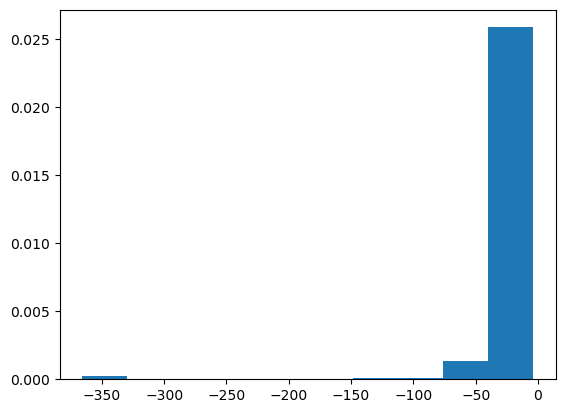

In [79]:
plt.hist(EB_dist, weights=EB_dist_weights, density=True)
#plt.hist(EB_dist)
plt.show()